<a href="https://colab.research.google.com/github/macabdul9/generative-adversarial-network/blob/master/generative_adversarial_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [0]:
import keras 
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam


In [0]:
import os
import shutil

In [0]:
# shutil.rmtree('images')
# shutil.rmtree('model')

In [0]:
os.mkdir('model')
os.mkdir('images')

# Data Pipeline

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (_, _) = cifar10.load_data()

In [166]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [0]:
import matplotlib.pyplot as plt

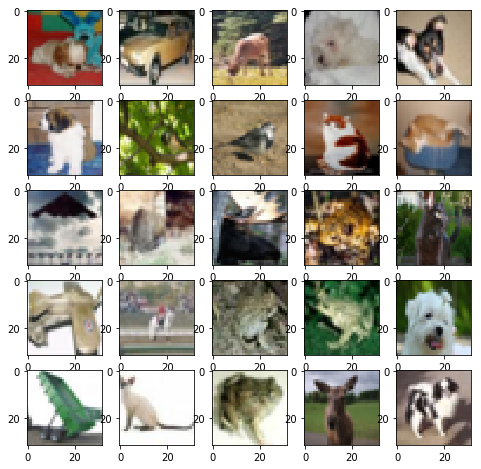

In [168]:
_, axarr = plt.subplots(5, 5, figsize=(8, 8))

for r in range(5):
  for c in range(5):
    axarr[r, c].imshow(x_train[np.random.randint(0, x_train.shape[0])], cmap = 'gray')
plt.show()

In [0]:
# normalize the data bw [-1, 1]

x_train = (x_train - 127.0)/127

In [170]:
print(np.min(x_train), np.max(x_train))

-1.0 1.0078740157480315


# Building GAN Model

In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(x_train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

adam = Adam(lr=2e-4, beta_1=0.5, )

### Generator Network

In [0]:
generator = Sequential()

In [0]:
generator.add(Dense(256, input_shape = (noise_dim, )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(3072, activation='tanh'))

In [0]:
generator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [175]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 3072)              3148800   
Total para

### Discriminator Network

In [0]:
discriminator = Sequential()

In [0]:
# Downsampling
discriminator.add(Dense(512, input_shape =(3072, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

In [0]:
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [179]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 129       
Total para

In [180]:
x_train = x_train.reshape(-1, 32*32*3)
print(x_train.shape)

(50000, 3072)


In [0]:


def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples, 32, 32, 3)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()



### Making Adversarial Network

In [0]:
# GAN
## 1. make discriminator non-trainable
discriminator.trainable = False
gan_input = Input(shape=(noise_dim, ))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input, gan_output)
model.compile(loss='binary_crossentropy', optimizer=adam)

#### Training in Loop

Epoch 1 Disc Loss 0.6224 Generator Loss 1.3268
Epoch 2 Disc Loss 0.6248 Generator Loss 1.3703
Epoch 3 Disc Loss 0.6319 Generator Loss 1.3448
Epoch 4 Disc Loss 0.6314 Generator Loss 1.3092


W0824 09:43:26.835997 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.853364 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.869228 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.885210 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.901346 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.918209 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5 Disc Loss 0.6329 Generator Loss 1.2918


W0824 09:43:26.944553 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.962674 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.979043 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:26.995738 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:27.014102 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:27.035952 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:43:27.053753 140543

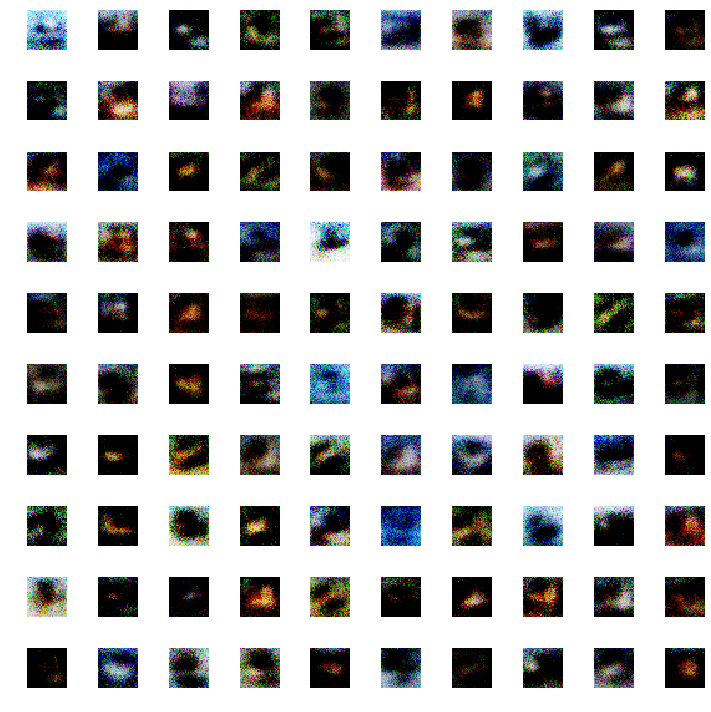

Epoch 6 Disc Loss 0.6283 Generator Loss 1.3215
Epoch 7 Disc Loss 0.6135 Generator Loss 1.2987
Epoch 8 Disc Loss 0.6197 Generator Loss 1.3296
Epoch 9 Disc Loss 0.6223 Generator Loss 1.3289


W0824 09:44:14.331070 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.348768 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.365852 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.384564 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.402695 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.419706 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10 Disc Loss 0.6195 Generator Loss 1.3253


W0824 09:44:14.438350 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.457298 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.474192 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.491542 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.508542 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.527567 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:44:14.544636 140543

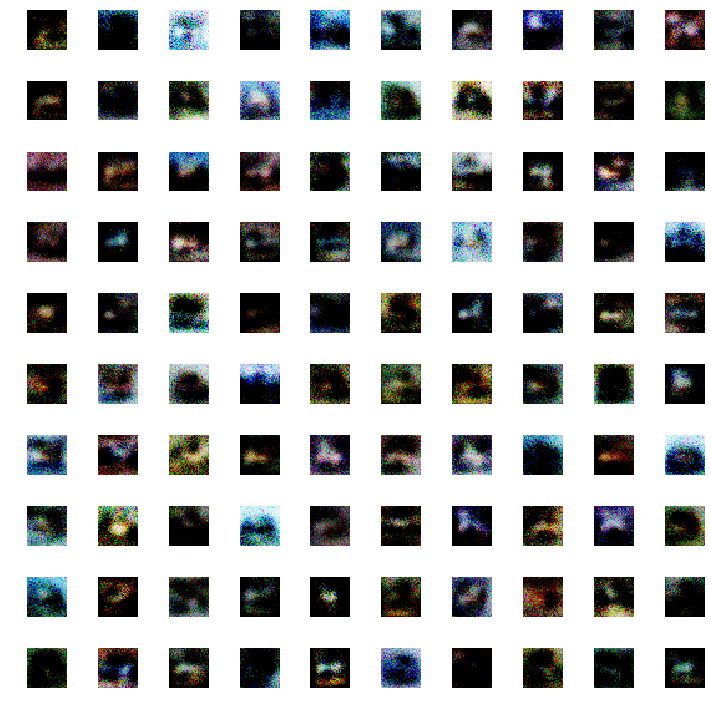

Epoch 11 Disc Loss 0.6173 Generator Loss 1.3177
Epoch 12 Disc Loss 0.6252 Generator Loss 1.3079
Epoch 13 Disc Loss 0.6319 Generator Loss 1.2725
Epoch 14 Disc Loss 0.6315 Generator Loss 1.3021


W0824 09:45:02.571469 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.590679 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.607536 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.623856 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.640281 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.656738 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.674449 140543

Epoch 15 Disc Loss 0.6267 Generator Loss 1.2602


W0824 09:45:02.693500 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.709029 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.725767 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.740893 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.756291 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.774854 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:02.794357 140543

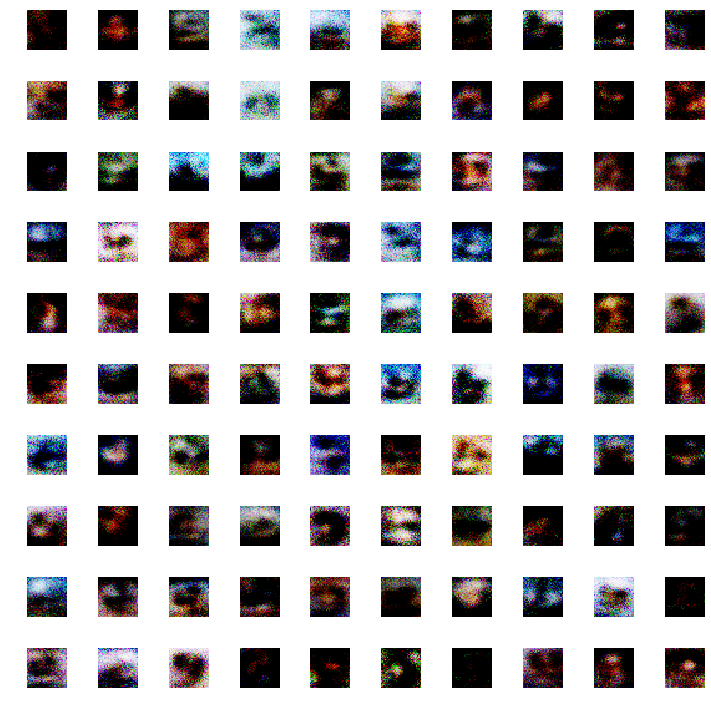

Epoch 16 Disc Loss 0.6281 Generator Loss 1.2812
Epoch 17 Disc Loss 0.6450 Generator Loss 1.2306
Epoch 18 Disc Loss 0.6277 Generator Loss 1.2183
Epoch 19 Disc Loss 0.6320 Generator Loss 1.2218


W0824 09:45:48.197721 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.215036 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.230968 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.245933 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.263715 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.279405 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.296947 140543

Epoch 20 Disc Loss 0.6339 Generator Loss 1.2348


W0824 09:45:48.315005 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.331107 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.348241 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.364524 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.381179 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.398096 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:45:48.417284 140543

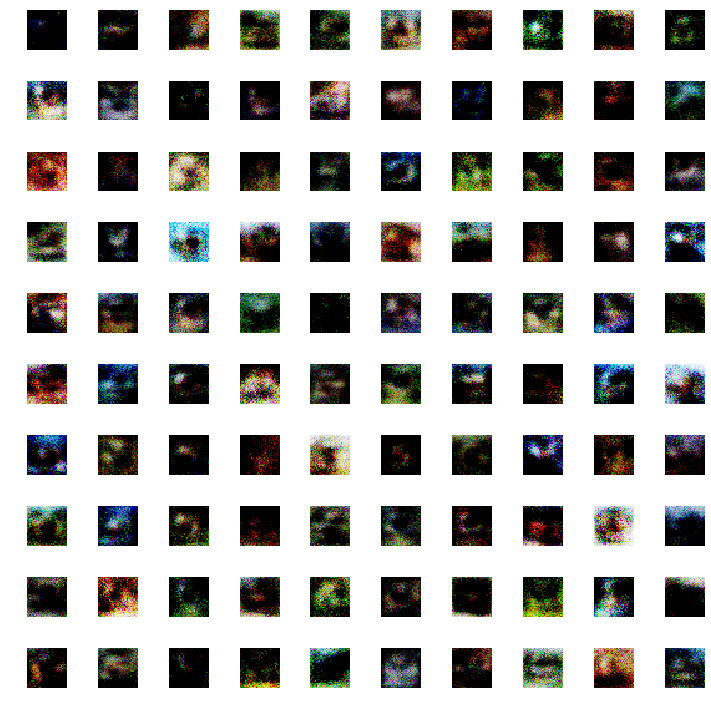

Epoch 21 Disc Loss 0.6287 Generator Loss 1.2331
Epoch 22 Disc Loss 0.6295 Generator Loss 1.2317
Epoch 23 Disc Loss 0.6273 Generator Loss 1.2089
Epoch 24 Disc Loss 0.6415 Generator Loss 1.2007


W0824 09:46:34.506310 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.525660 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.540322 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.565741 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.586511 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.614115 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25 Disc Loss 0.6394 Generator Loss 1.1621


W0824 09:46:34.636360 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.652080 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.670030 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.684991 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.700718 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.716533 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:46:34.734178 140543

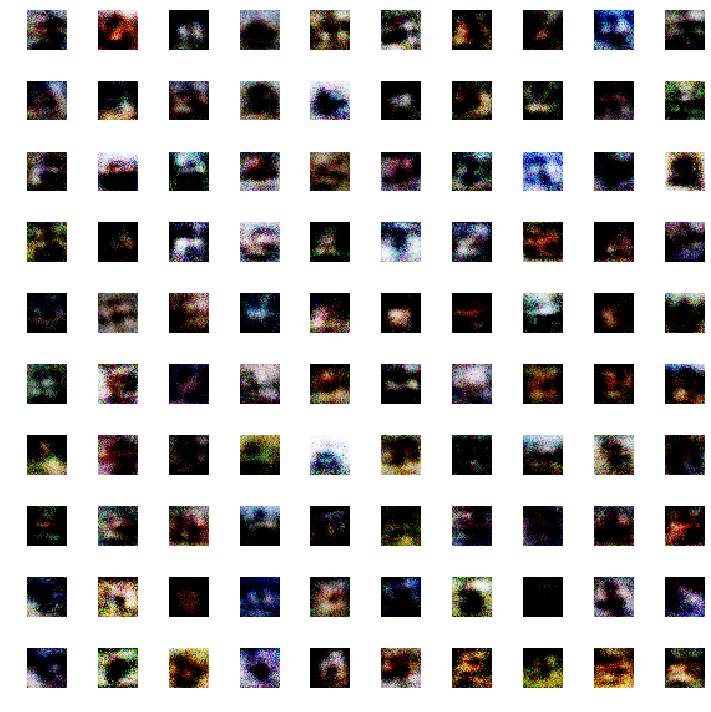

Epoch 26 Disc Loss 0.6254 Generator Loss 1.2145
Epoch 27 Disc Loss 0.6301 Generator Loss 1.1793
Epoch 28 Disc Loss 0.6410 Generator Loss 1.1642
Epoch 29 Disc Loss 0.6411 Generator Loss 1.1813


W0824 09:47:20.051491 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.073684 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.089347 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.103713 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.118636 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.133067 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.150240 140543

Epoch 30 Disc Loss 0.6450 Generator Loss 1.1474


W0824 09:47:20.168680 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.185299 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.200852 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.216136 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.231121 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.246138 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:47:20.262853 140543

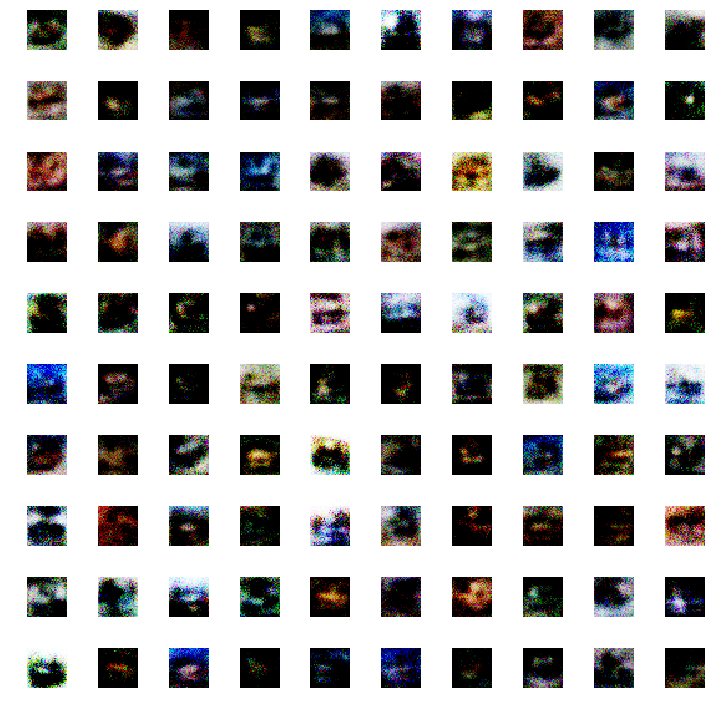

Epoch 31 Disc Loss 0.6474 Generator Loss 1.1273
Epoch 32 Disc Loss 0.6496 Generator Loss 1.1310
Epoch 33 Disc Loss 0.6550 Generator Loss 1.1208
Epoch 34 Disc Loss 0.6576 Generator Loss 1.1027


W0824 09:48:05.368450 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.385653 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.400861 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.416337 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.431150 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.446239 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.462887 140543

Epoch 35 Disc Loss 0.6594 Generator Loss 1.0781


W0824 09:48:05.480857 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.495889 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.510574 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.525547 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.540479 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.555046 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:05.571897 140543

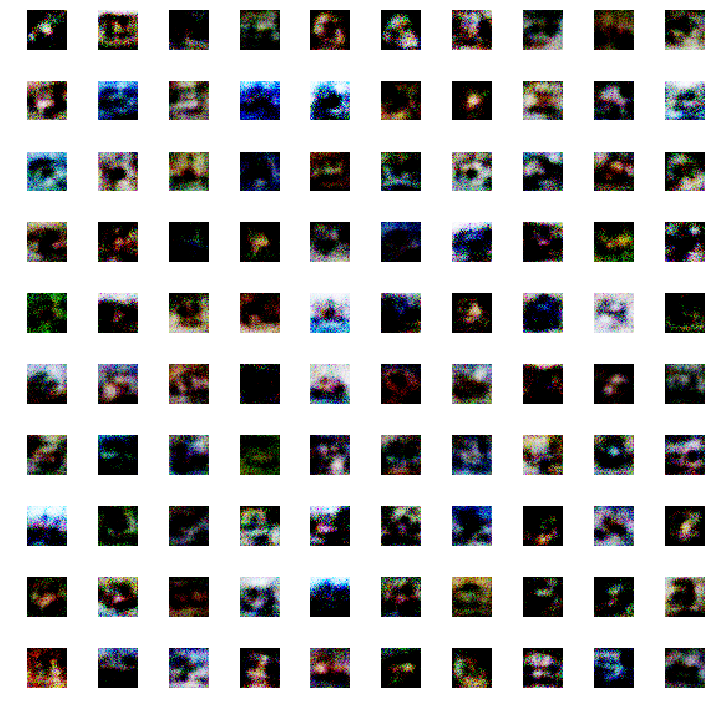

Epoch 36 Disc Loss 0.6674 Generator Loss 1.0565
Epoch 37 Disc Loss 0.6602 Generator Loss 1.0658
Epoch 38 Disc Loss 0.6602 Generator Loss 1.0444
Epoch 39 Disc Loss 0.6617 Generator Loss 1.0504


W0824 09:48:50.923253 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:50.941562 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:50.957492 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:50.972530 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:50.987606 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.002661 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.019498 140543

Epoch 40 Disc Loss 0.6663 Generator Loss 1.0120


W0824 09:48:51.038684 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.058175 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.073743 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.090245 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.106444 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.121736 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:48:51.139834 140543

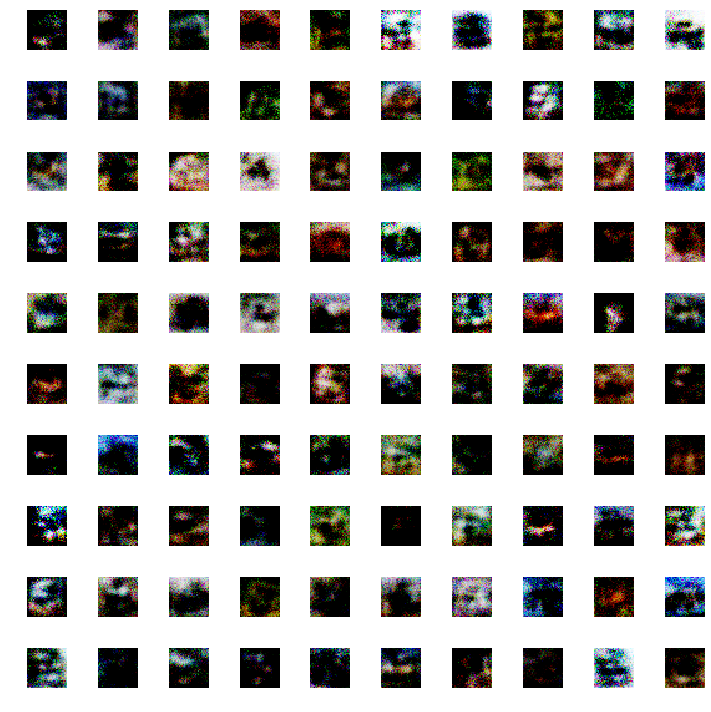

Epoch 41 Disc Loss 0.6656 Generator Loss 1.0235
Epoch 42 Disc Loss 0.6721 Generator Loss 0.9974
Epoch 43 Disc Loss 0.6725 Generator Loss 0.9818
Epoch 44 Disc Loss 0.6702 Generator Loss 1.0016


W0824 09:49:36.230022 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.247279 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.262689 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.278651 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.294684 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.314211 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45 Disc Loss 0.6696 Generator Loss 0.9860


W0824 09:49:36.335101 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.356016 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.371861 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.389865 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.406880 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.424296 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:49:36.443090 140543

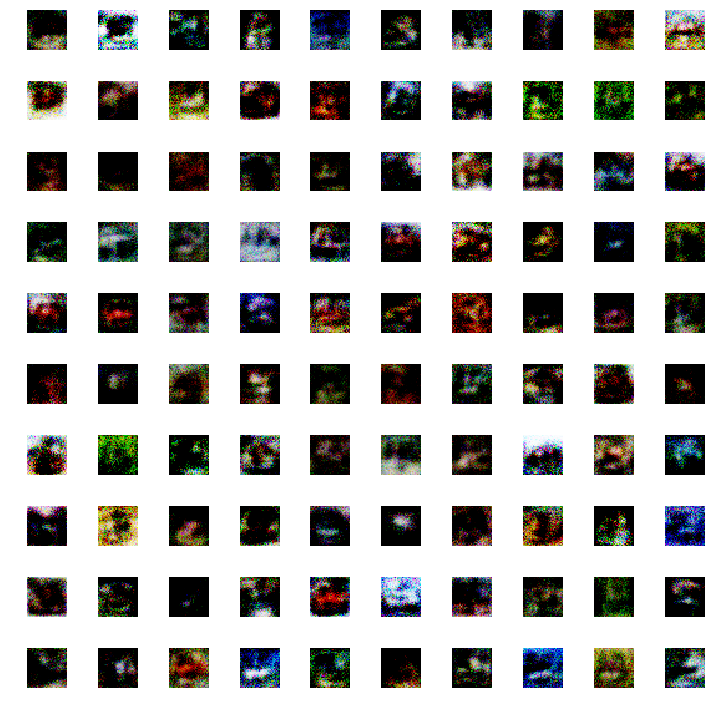

Epoch 46 Disc Loss 0.6677 Generator Loss 0.9803
Epoch 47 Disc Loss 0.6714 Generator Loss 0.9635
Epoch 48 Disc Loss 0.6728 Generator Loss 0.9600
Epoch 49 Disc Loss 0.6804 Generator Loss 0.9621


W0824 09:50:24.384594 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.405786 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.423320 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.440018 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.457129 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.475267 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50 Disc Loss 0.6780 Generator Loss 0.9375


W0824 09:50:24.498559 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.516524 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.533058 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.549298 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.566292 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.583526 140543438968704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0824 09:50:24.601072 140543

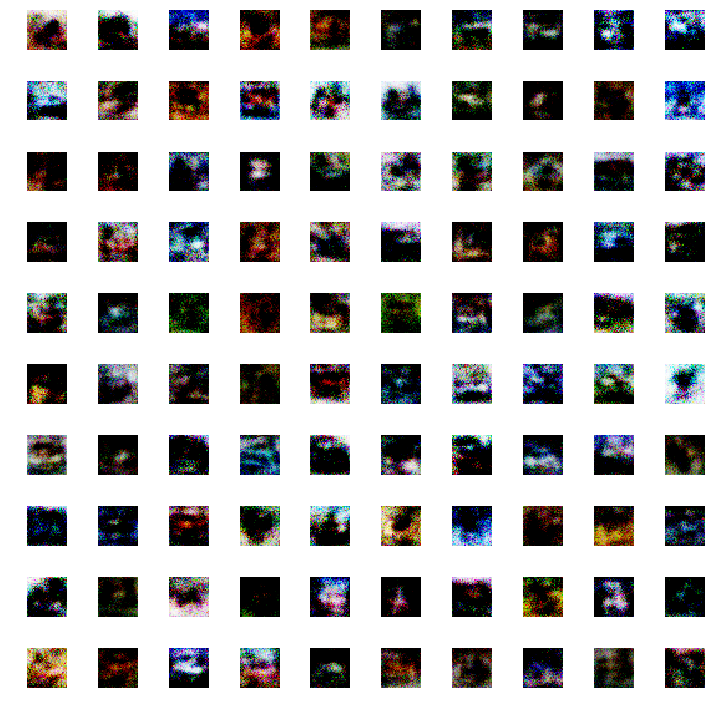

In [186]:
# Training Loop
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0, x_train.shape[0],HALF_BATCH)
        real_imgs = x_train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
